## ANLY 590 HW2 - Beixuan Jia

### I. Feedforward: Building a ReLU neural network

### 1 - 2 Draw and Write the Equation of the NN

Link to 1-2's answer: https://github.com/beixuan-jia/ANLY-590/blob/master/Assignments/hw2_nn.jpg

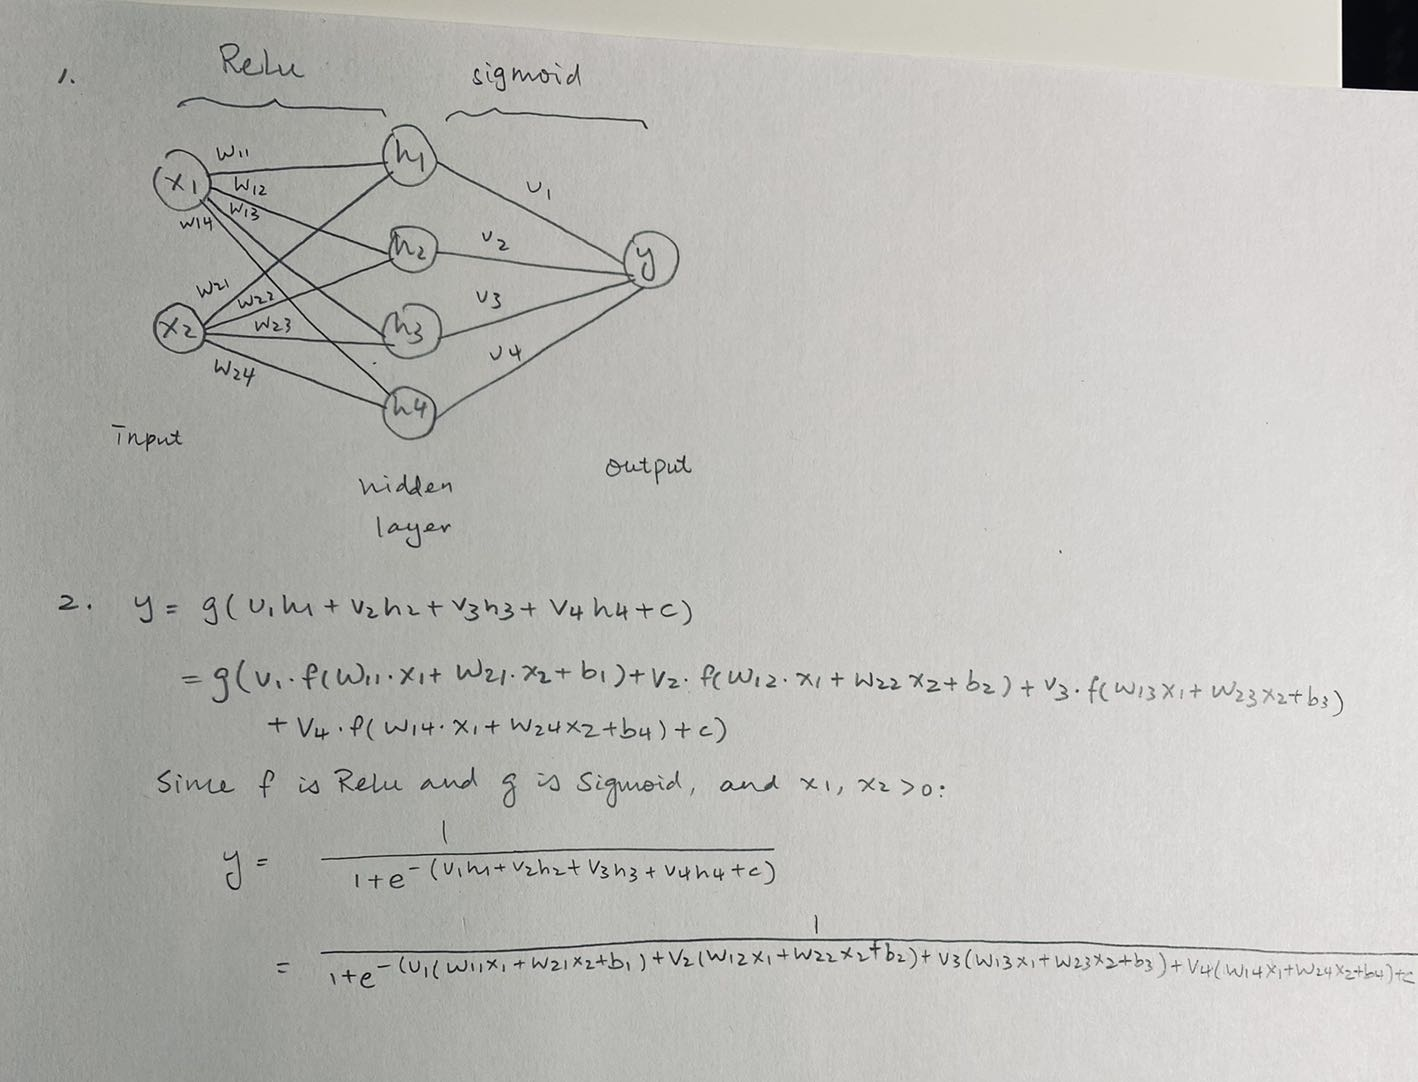

### 3 - 4. Write out the forward-pass function in python, call it ff_nn_ReLu. What are the class probabilities associated with the forward pass of each sample?

In [1]:
import numpy as np

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
from __future__ import division

In [3]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))
def ff_nn_ReLu(X, W, b, V, c):

    res = relu(np.array(X)@np.array(W)+b)
    return sigmoid(np.dot(res,np.array(V))+c)

In [5]:
W = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
V = [1, 0, -1, 1]
c = 1
X = [[1, -1], [0, -1], [0, 1]]
ff_nn_ReLu(X,W,b,V,c)

array([0.81757448, 0.62245933, 0.62245933])

### II. Gradient Descent

### 1. What are the partial derivatives of f with respect to x and to y?

Partial derivatives of f with respect to x: 

In [6]:
from sympy import symbols, diff
x, y, z = symbols('x y z', real=True)
f = (3-x**3) + 50*(2*y**2-x)**2

In [7]:
df_dx = diff(f, x)
print(df_dx)

-3*x**2 + 100*x - 200*y**2


Partial derivatives of f with respect to y:

In [8]:
df_dy = diff(f, y)
print(df_dy)

400*y*(-x + 2*y**2)


### 2. Create a visualization of the contours of this function.

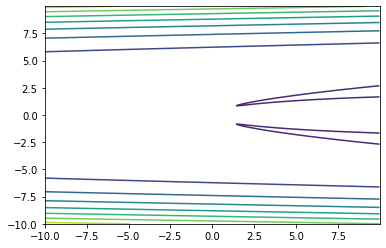

In [9]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates

In [10]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 + 100*x - 200*y**2 
    df_dy = 400*y*(-x + 2*y**2)
    return np.array([df_dx, df_dy])

In [11]:
def grad_descent1(starting_point=None, iterations=10000000, learning_rate=0.00000000001):
  if starting_point is None:
    point = np.random.uniform(-10, 10, size = 2)
  else: 
    point = starting_point
  trajectory = [point]

  for i in range (iterations):
    grad = grad_f(point)
    point = point - learning_rate * grad
    trajectory.append(point)

  return np.array(trajectory)

Learning rate = 0.00001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


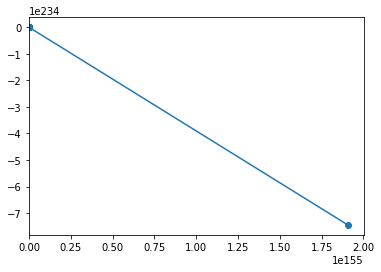

In [12]:
np.random.seed(10)
traj = grad_descent1(iterations=10000, learning_rate=0.00001) # small learning rate: very slow process; large learning rate: bouncing around

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Learning rate = 0.000001

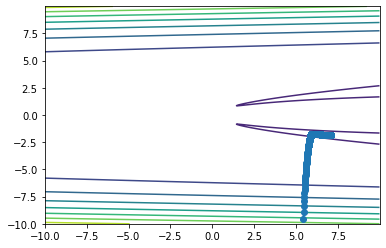

In [13]:
np.random.seed(10)
traj = grad_descent1(iterations=10000, learning_rate=0.000001) # small learning rate: very slow process; large learning rate: bouncing around

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Learning rate = 0.0000001

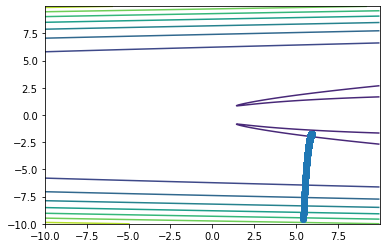

In [14]:
np.random.seed(10)
traj = grad_descent1(iterations=10000, learning_rate=0.0000001) # small learning rate: very slow process; large learning rate: bouncing around

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

The result shows that the proper learning rate for this problem is probably 0.000001, since 0.00001 might be too fast (a straight line) and 0.00000001 might be too slow. 

### 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [15]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  # alpha: how quickly we forget the last step
  # epsilon: learning rate
  if starting_point is not None:
    point = starting_point
  else:
    point = np.random.uniform(-10, 10, size=2)

  trajectory = [point]
  v = np.zeros(point.size)

  for i in range(iterations):
    grad = grad_f(point)
    v = alpha * v + epsilon * grad
    point = point - v
    trajectory.append(point)
  
  return np.array(trajectory)

epsilon = 0.00001, alpha = 0.05


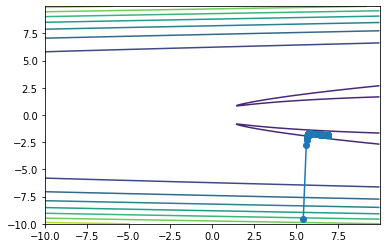

In [16]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=1000, epsilon = 0.00001, alpha = 0.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

epsilon=0.0001, alpha=0.05

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


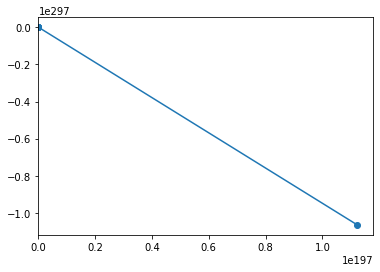

In [17]:
np.random.seed(10)

traj = grad_descent_with_momentum(iterations=1000, epsilon=0.0001, alpha=0.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

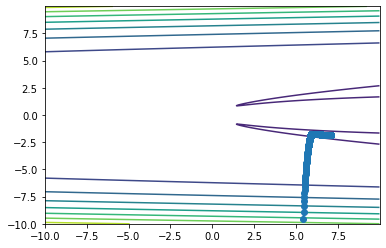

In [18]:
np.random.seed(10)

traj = grad_descent_with_momentum(iterations=10000, epsilon=0.000001, alpha=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

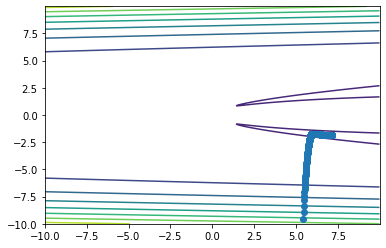

In [19]:
np.random.seed(10)

traj = grad_descent_with_momentum(iterations=10000, epsilon=0.000001, alpha=0.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

epsilon = 0.0001, alpha = 0.5

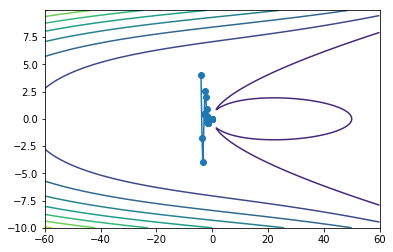

In [ ]:
np.random.seed(10)

traj = grad_descent_with_momentum(iterations=10000, epsilon=0.0001, alpha=0.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

The result shows that for this specific example, epsilon seems to affect the contour more than alpha, although as alpha increased, it results in a faster convergence and might cause some bouncing as well.

### III. Backprop

### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters

In [ ]:
# loss function for the model 
def binary_crossentropy(y_hat, y_true):
  return - y_true*np.log(y_hat) - (1-y_true)* np.log(1-y_hat)

Link to 3.1's Answer: https://github.com/beixuan-jia/ANLY-590/blob/master/Assignments/hw2_deri.jpg

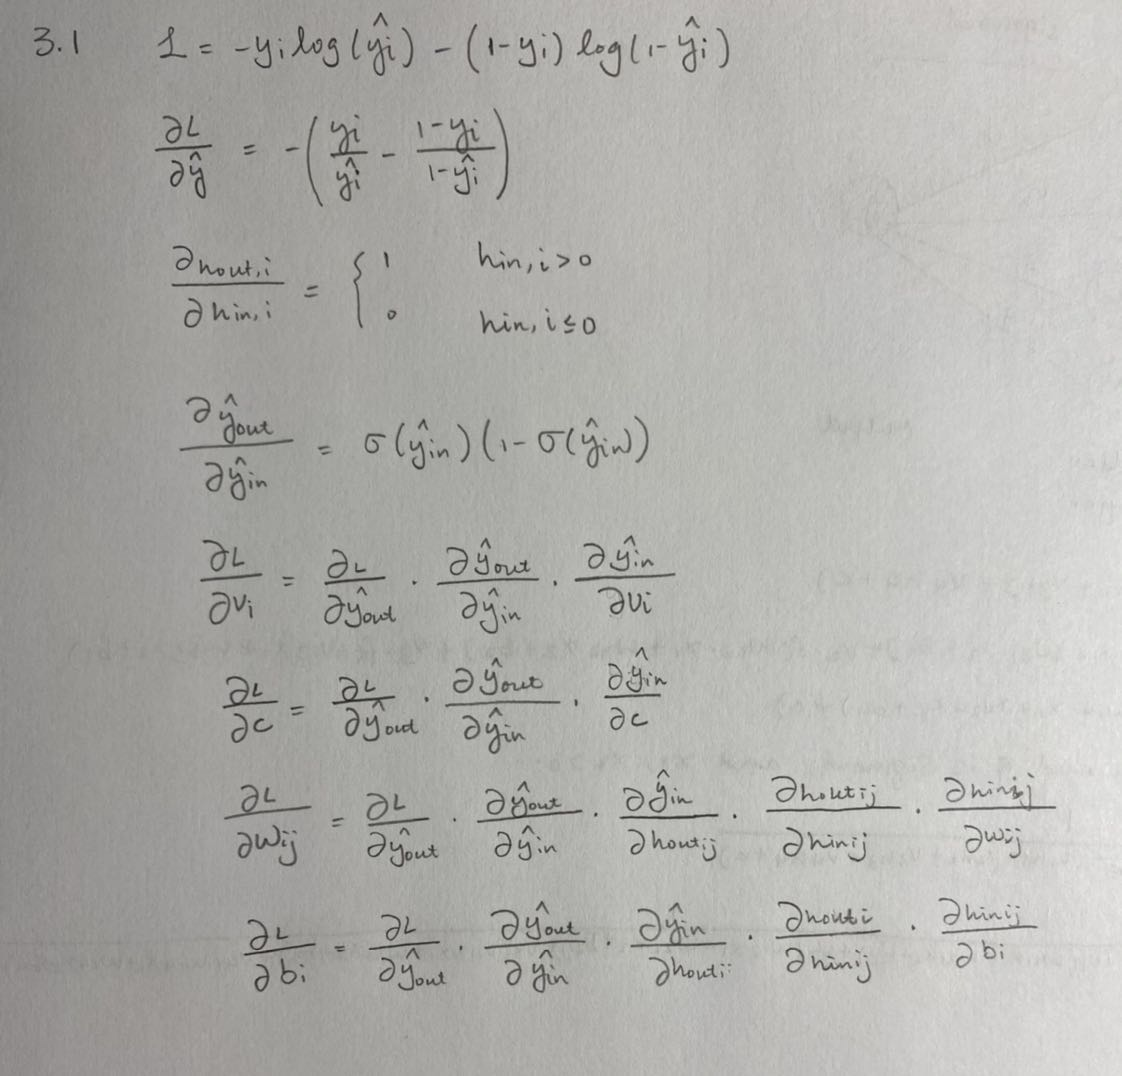

### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [20]:
def grad_f(x, y, y_hat, w, b, v, c):
    loss_y_hat = (y/y_hat - (1-y)/(1-y_hat))
    h = relu(np.array(x)@np.array(w)+b)
    
    dw = x.T.dot(np.expand_dims((loss_y_hat * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
    db = (loss_y_hat* y_hat*(1-y_hat)).T.dot(np.where(h<=0,0,1))*v
    
    dv = (loss_y_hat* y_hat*(1-y_hat)).T.dot(h)
    dc = loss_y_hat.dot(y_hat*(1-y_hat))
    
    return np.array([dw,db,dv,dc])/len(y)

In [21]:
x = np.array([[1,-1], [0,-1], [0, 1]])
w = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
v = np.array([1, 0, -1, 1])
c = 1
y_pred = ff_nn_ReLu(x,w,b,v,c)

In [22]:
y_pred

array([0.81757448, 0.62245933, 0.62245933])

In [23]:
grad_f(x, np.array([1,1,1]),y_pred,w,b,v,c)

array([array([[ 0.06080851,  0.        , -0.06080851,  0.06080851],
       [-0.06080851,  0.        ,  0.06080851, -0.06080851]]),
       array([ 0.06080851,  0.        , -0.31250229,  0.12584689]),
       array([0.06080851, 0.        , 0.28209803, 0.12584689]),
       0.3125022871342158], dtype=object)

### 3. Generate a synthetic dataset like the XOR pattern (see below)

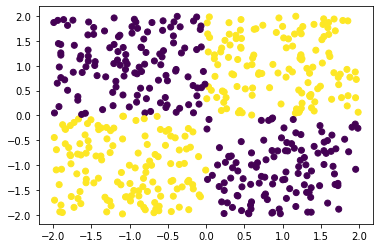

In [24]:
x=4*np.random.rand(500,2)-2
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result

In [25]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

In [26]:
def grad_descent(x, y_true, w, b, v, c, iterations=10, learning_rate=0.1):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    for i in range(iterations):
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        w = w+learning_rate*dw
        b = b+learning_rate*db
        v = v+learning_rate*dv
        c = c+learning_rate*dc
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [ ]:
array, losses = grad_descent(X, y, w, b,v,c)

In [ ]:
losses

[508.4732875881929,
 486.86622494000085,
 467.56698356863444,
 450.48372335305413,
 435.6210072652458,
 422.7623716001996,
 411.6401055178843,
 402.10703761983507,
 394.0202607413555,
 387.21923518758655,
 381.5454832390819]

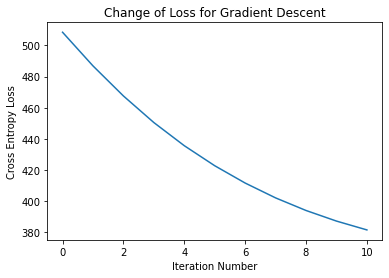

In [ ]:
plt.plot(losses)
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Iteration Number")
plt.title("Change of Loss for Gradient Descent")
plt.show()

### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently

In [ ]:
def grad_descent_w_momentum(x, y_true, w, b, v, c, iterations=10, alpha=.1, epsilon=0.5):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    vw = np.zeros(w.shape)
    vb = np.zeros(b.shape)
    vv = np.zeros(v.shape)
    vc = 0
    for _ in range(iterations):
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        vw = alpha*vw - epsilon*dw
        vb = alpha*vb - epsilon*db
        vv = alpha*vv - epsilon*dv
        vc = alpha*vc - epsilon*dc
        w = w-vw
        b = b-vb
        v = v-vv
        c = c-vc
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [ ]:
array_m, losses_m =  grad_descent_w_momentum(X, y, w,b,v,c)
losses_m

[508.4732875881929,
 414.8666939192808,
 370.540161909759,
 358.27788315775376,
 354.87900119062107,
 353.72338008769856,
 353.2150316736119,
 352.8851054253812,
 352.6077704702281,
 352.3527623620165,
 352.1102050529948]

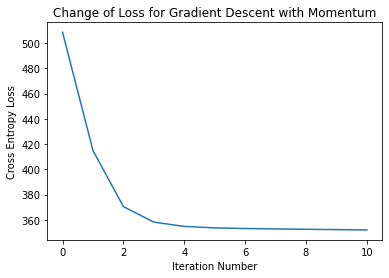

In [ ]:
plt.plot(losses_m)
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Iteration Number")
plt.title("Change of Loss for Gradient Descent with Momentum")
plt.show()

#### As the plots show, when interations increases, gradient descent with momentum converges quicker than the gradient descent without momentum.

### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot

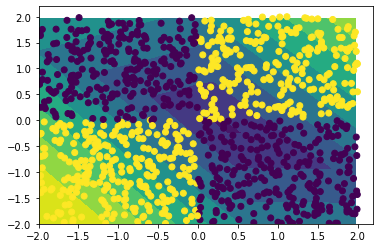

In [ ]:
x0 = []
x1 = []
for i,x in enumerate(X):
    if x[0]*x[1] >= 0:
        y[i] = 1
        x1.append(x)
    else:
        x0.append(x)
x1 = np.array(x1)
x0 = np.array(x0)
x1 = np.arange(-2.0, 2.0, 0.025)
x2 = np.arange(-2.0, 2.0, 0.025)
X1, X2 = np.meshgrid(x1, x2)
predict = ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T,array_m[0],array_m[1],array_m[2],array_m[3]).reshape((160, 160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, predict)
plt.scatter(X[:,0],X[:,1],c=y)